# Problem 1

## Adams-Bashforth methods

The Adams-Bashforth methods with $s = 1, 2, 3, 4$ are

\begin{align*}
    y_{n+1} &= y_n + hf(t_n, y_n) \\
    y_{n+2} &= y_{n+1} + h\left(\frac{3}{2} f(t_{n+1}, y_{n+1}) - \frac{1}{2} f(t_n, y_n)\right) \\
    y_{n+3} &= y_{n+2} + h\left(\frac{23}{12} f(t_{n+2}, y_{n+2}) - \frac{16}{12} f(t_{n+1}, y_{n+1}) + \frac{5}{12} f(t_n, y_n)\right) \\
    y_{n+4} &= y_{n+3} + h \left(\frac{55}{24} f(t_{n+3}, y_{n+3}) - \frac{59}{24} f(t_{n+2}, y_{n+2}) + \frac{37}{24} f(t_{n+1}, y_{n+1}) - \frac{9}{24} f(t_n, h_n)\right) 
\end{align*}

## Runge-Kutta Methods

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4) \\
    t_{n+1} &= t_n + h
\end{align*}

for $n = 0, 1, 2, 3$:

\begin{align*}
    k_1 &= f(t_n, y_n) \\
    k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}\cdot k_1\right) \\
    k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}\cdot k_2\right) \\
    k_4 &= f\left(t_n + h, y_n + h\cdot k_3 \right)
\end{align*}

In [4]:
import math
import numpy as np
import time as timeit 
import matplotlib.pyplot as plt

## Testing

<h3>

For this Testing part, we used a different pair of mass 

\begin{align*}
    & M_1 = 100 \\
    & M_2 = 1
\end{align*}

, where the initial conditions are:

\begin{align*}
    & r_1 = (0, 0, 0) \\
    & r_2 = (3, 0, 0) \\
    & v_1 = (0, -1, 0) \\
    & v_2 = (0, 5, 0)
\end{align*}

Adams-bashforth code runs in 3.415550947189331 sec.


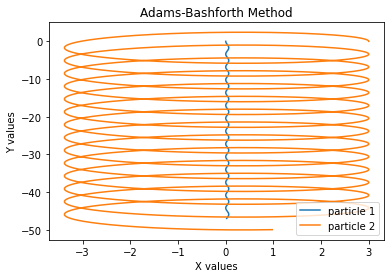

In [5]:
# contains the three body problem functions along with their intial conditions
# outputs their velocities and positions
def main_function(full_vector, t):
    '''
    This main_function is the two-body Newtonian Gravitity Simulation.

    Argument:

    * full_vector: takes in a vector which has a form:
    (
        r1[0], r1[1], r1[2],
        r2[0], r2[1], r2[2],
        v1[0], v1[1], v1[2],
        v2[0], v2[1], v2[2]
    )
    
    * t: the time variable 
    '''

    m1 = 100
    m2 = 1
    
    r1 = np.array(full_vector[0:3])
    r2 = np.array(full_vector[3:6])
    v1 = np.array(full_vector[6:9])
    v2 = np.array(full_vector[9:12])

    # print("r1")
    # print(r1)
    # print("r2")
    # print(r2)

    distance = np.linalg.norm(r1 - r2)  # Calculate the distance between r1 and r2

    a2 =   m1 * (r1 - r2) / (distance**3)
    a1 = - m2 * (r1 - r2) / (distance**3)

    # The velocities are used when graphing over time to see how quickly the particles move
    return np.array(
        (
            v1[0], v1[1], v1[2],
            v2[0], v2[1], v2[2],
            a1[0], a1[1], a1[2],
            a2[0], a2[1], a2[2]
        )
    )

#this will do one iteration of RK4
def rk4(dx, y0, x0, function):

    y = y0
    current_x = x0

    #first RK4 step
    k1 = dx*function(y, current_x)

    #second RK4 step
    k2 = dx*function(y + k1/ 2, current_x + dx / 2)

    #third RK4 step
    k3 = dx*function(y + k2/ 2, current_x + dx / 2)

    #fourth RK4 step
    k4 = dx*function(y + k3, current_x + dx)

    dydx = 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    y = y + dydx
    
    current_x = current_x + dx
        
    return y, current_x


def AdamB(y_values, time, h, main_function):
    '''
    This is the Adams-Bashforth method which uses 4 steps.

    Arguments:

    * y_values: input y values. [y0, y1, y2, y3]. These y values are bootstraped from
    another numerical method.

    * time: time parameter 

    * h: stepsize 

    RETURN:

    * y_values: [y1, y2, y3, y4], new set of the list with a new y value

    * time: the time at the next step
    '''

    y0 = y_values[0]
    y1 = y_values[1]
    y2 = y_values[2]
    y3 = y_values[3]

    y4 = y3 + h * (55/24 * main_function(y3, time + 3 * h) - 59/24 * main_function(y2, time + 2 * h) \
                            + 37/24 * main_function(y1, time + h) - 9/24 * main_function(y0, time))

    
    time += h

    #saves all the y values so they can be used in the next iteration
    y_values_new = [y1, y2, y3, y4]

    return y_values_new, time


### MAIN CODE ###

# allows the length to be adjusted while keeping the points proportional
l = 1

# The position and velocity for the first particle
r1 = np.array((0, 0, 0), dtype=np.float64)
v1 = np.array((0, -1, 0), dtype=np.float64)

# The position and velocity for the second particle
r2 = np.array((3, 0, 0), dtype=np.float64)
v2 = np.array((0, 5, 0), dtype=np.float64)

# The position and velocity of both
full_vector = np.array((*r1, *r2, *v1, *v2))

g = 1



time = 0

#this makes all the inital y values vectors like y0
y_values = []
y0 = full_vector
y0_rk4 = full_vector


# Coordinates of each body
x_1_vals = []
x_2_vals = []

y_1_vals = []
y_2_vals = []

v_x1_velocity = []
v_x2_velocity = []

v_y1_velocity = []
v_y2_velocity = []

time_array = []

h = 1e-3

#this creates the first three initial conditions based on y0
x0 = 0
y1, x1 = rk4(h, y0, x0, main_function)
y2, x2 = rk4(h, y1, x1, main_function)
y3, x3 = rk4(h, y2, x2, main_function)

test = []
i = 0
y_values = [y0, y1, y2, y3]

# Adds initial y0, y1, y2, y3, y4 from RK4 
x_1_vals.append(y_values[0][0])
x_1_vals.append(y_values[1][0])
x_1_vals.append(y_values[2][0])
x_1_vals.append(y_values[3][0])

y_1_vals.append(y_values[0][1])
y_1_vals.append(y_values[1][1])
y_1_vals.append(y_values[2][1])
y_1_vals.append(y_values[3][1])

x_2_vals.append(y_values[0][3])
x_2_vals.append(y_values[1][3])
x_2_vals.append(y_values[2][3])
x_2_vals.append(y_values[3][3])

y_2_vals.append(y_values[0][4])
y_2_vals.append(y_values[1][4])
y_2_vals.append(y_values[2][4])
y_2_vals.append(y_values[3][4])


START_TIME = timeit.time()
while(time<=100):
    #updates the y_values in AdamsBashforth
    y_values, time = AdamB(y_values, time, h, main_function)

    # Append new y values calculated from Adams Bashforth Method
    x_1_vals.append(y_values[-1][0])
    y_1_vals.append(y_values[-1][1])
    x_2_vals.append(y_values[-1][3])
    y_2_vals.append(y_values[-1][4])
    time_array.append(time)
    
    #updates the time
    time = time + h

# Calculation of run time
END_TIME = timeit.time()
DURATION_TIME_Adams = END_TIME - START_TIME
print(f"Adams-bashforth code runs in {DURATION_TIME_Adams} sec.")



plt.plot(x_1_vals,y_1_vals, label="particle 1")
plt.plot(x_2_vals,y_2_vals, label="particle 2")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Adams-Bashforth Method")
plt.legend()
plt.show()


RK4 code runs in 3.294323205947876 sec.


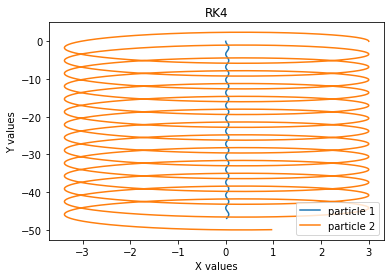

In [6]:
x0_rk4 = 0
time_rk4 = 0

#the position of the x or y particles using RK4
x_1_rk4 = []
x_2_rk4 = []
y_1_rk4 = []
y_2_rk4 = []

#the difference between the x or y values from both particles
x_diff_list = []
y_diff_list = []



START_TIME2 = timeit.time()
while(time_rk4<=100):
    y0_rk4,time_rk4= rk4(h, y0_rk4, time_rk4, main_function)

    # Append new y values calculated from Adams Bashforth Method
    x_1_rk4.append(y0_rk4[0])
    y_1_rk4.append(y0_rk4[1])
    x_2_rk4.append(y0_rk4[3])
    y_2_rk4.append(y0_rk4[4])
    

    time_rk4 = time_rk4 + h

#Adams Bashforth values have a few more iterations than RK4. This is because it was bootstrapped 
#for the first few iterations
x_diff_list = abs(np.array(x_1_vals[:len(x_1_rk4)])-np.array(x_1_rk4[:len(x_1_rk4)]))
y_diff_list = abs(np.array(y_1_vals[:len(x_1_rk4)])-np.array(y_1_rk4[:len(x_1_rk4)]))

x_diff2_list = abs(np.array(x_2_vals[:len(x_2_rk4)])-np.array(x_2_rk4[:len(x_2_rk4)]))
y_diff2_list = abs(np.array(y_2_vals[:len(x_2_rk4)])-np.array(y_2_rk4[:len(x_2_rk4)]))
    
# Calculation of run time
END_TIME2 = timeit.time()
DURATION_TIME_RK4 = END_TIME2 - START_TIME2
print(f"RK4 code runs in {DURATION_TIME_RK4} sec.")

plt.plot(x_1_rk4,y_1_rk4, label="particle 1")
plt.plot(x_2_rk4,y_2_rk4, label="particle 2")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("RK4")
plt.legend()
plt.show()

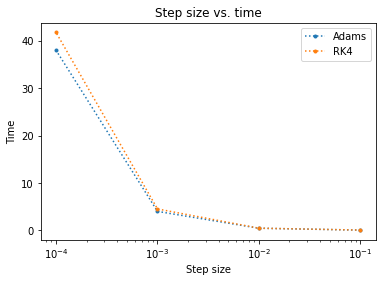

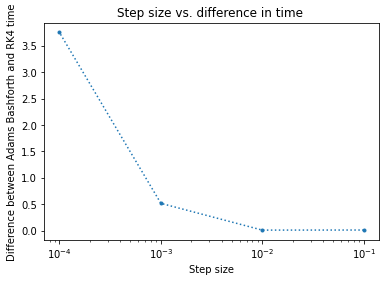

In [7]:
# These are the run time based on different step sizes
h = np.array([1e-1,1e-2,1e-3,1e-4])
Adam_time = np.array([0.07704854011535645,0.4722449779510498,4.020463466644287,37.96999168395996])
RK4_time = np.array([0.0884256362915039,0.4819629192352295,4.537031173706055,41.72061586380005])

plt.plot(h,Adam_time, label="Adams", ls=":", marker=".")
plt.plot(h,RK4_time, label="RK4", ls=":", marker=".")
plt.xscale('log')
plt.xlabel('Step size')
plt.ylabel('Time')
plt.legend()
plt.title('Step size vs. time')
plt.show()

plt.plot(h,abs(Adam_time - RK4_time), ls=":", marker=".")
plt.xscale('log')
plt.xlabel('Step size')
plt.ylabel('Difference between Adams Bashforth and RK4 time')
plt.title('Step size vs. difference in time ')
plt.show()

## Difference between Adams-Bashforth and RK4 methods

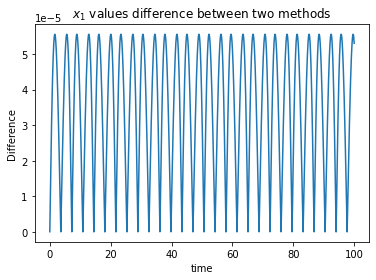

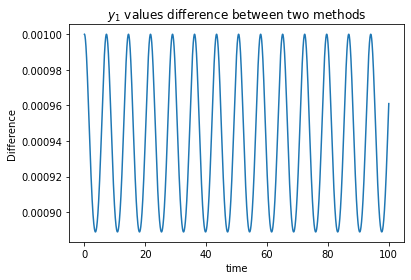

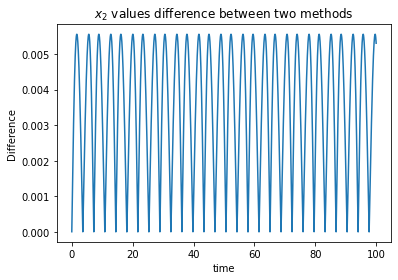

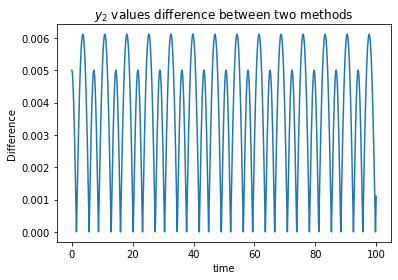

In [9]:
plt.plot(time_array, x_diff_list)
plt.title(r"$x_1$ values difference between two methods")
plt.xlabel("time")
plt.ylabel("Difference")
plt.show()

plt.plot(time_array, y_diff_list)
plt.title(r"$y_1$ values difference between two methods")
plt.xlabel("time")
plt.ylabel("Difference")
plt.show()

plt.plot(time_array, x_diff2_list)
plt.title(r"$x_2$ values difference between two methods")
plt.xlabel("time")
plt.ylabel("Difference")
plt.show()

plt.plot(time_array, y_diff2_list)
plt.title(r"$y_2$ values difference between two methods")
plt.xlabel("time")
plt.ylabel("Difference")
plt.show()

This Python code simulates the motion of two particles under the influence of Newtonian gravity using the Adams-Bashforth and RK4 methods. The two particles are treated as point masses, and their positions and velocities are updated over time.

AdamsBashforth

`main_function`: This function calculates the forces and velocities for two particles in a two-body gravitational system. It takes a `full_vector` and `t` as input. `full_vector` is a vector containing the initial positions (`r1` and `r2`) and velocities (`v1` and `v2`) of the two particles. It then calculates the forces and accelerations between the particles and returns an array containing the updated velocities and accelerations for both particles.

`rk4`: This function performs one iteration of the Runge-Kutta 4th order (RK4) method for numerical integration. It takes `dx` (step size), `y0` (initial values), `x0` (initial time), and `function` (the function to be integrated) as input. It returns the updated values of `y` and `x` after one RK4 iteration.

`AdamB`: This function implements the Adams-Bashforth method, a numerical integration method. It takes `y_values` (a list of previous y values), `time` (current time), `h` (step size), and `main_function` as input. It calculates the next y value using the Adams-Bashforth formula and updates the time and y_values. It returns the updated `y_values` and `time`.

In the main code:
   - Initial conditions for the two particles (positions and velocities) are defined.
   - The full vector `full_vector` is created by combining the positions and velocities of both particles.
   - A time variable `time` is initialized to 0.
   - A loop runs until `time` reaches 100.
   - Initial y values are calculated using the RK4 method and stored in the `y_values` list.
   - The Adams-Bashforth method is applied iteratively to update the positions and velocities of the particles over time.
   - The positions of both particles (`x_1_vals`, `y_1_vals`, `x_2_vals`, `y_2_vals`) and the time values (`time_array`) are recorded at each time step.
   - The runtime of the Adams-Bashforth code is measured.


RK4

A loop runs while `time_rk4` is less than or equal to 100, simulating the motion of particles using RK4.
   - The RK4 method is applied to update the positions of particles.
   - The updated positions are appended to the respective lists.
   - `time_rk4` is incremented by the time step `h`.

After the RK4 simulation is complete, the code calculates the differences between the positions obtained using RK4 and Adams-Bashforth for the same time steps. This is done by aligning the two sets of positions and calculating the absolute differences.

This code performs a similar simulation as the previous code but specifically uses the RK4 numerical integration method. It shows that the time difference between RK4 and AdamsBashforth is usually negligeble, unless the step size is smaller than 10^-4. It also shows that the difference between the position values of the two methods is not very close. Usually the difference is around 10^-3 for the y values and about 1^-5 for the x values. It makes sense that the x values would have a smaller differnce between them because there is much less moption in the x direction. 

# Problem 2

## Outline

\begin{align*}
    & \frac{d^2\psi}{dr^2} + \frac{2}{r}\frac{d\psi}{dr} = - 4\pi \rho \\
    & \rho(r) = 1/r^4 
\end{align*}
, where $r\in (1, 10)$, and initial conditions 

\begin{align*}
     \left. \frac{d\psi}{dr} \right|_{r=1} &= 0 \\
     \psi(10) &= 1
\

### Using Finite-differencing method:

\begin{align*}
     \frac{d^2\psi}{dr^2} &\approx \frac{\psi_{i+1} - 2\psi_{i} + \psi_{i+1}}{h^2} + \mathcal{O}(h^3) \\
     \frac{d\psi}{dr} &\approx \frac{\psi_{i+1}-\psi_{i-1}}{2h} + \mathcal{O}(h^3)
\end{align*}
, where $h = \frac{1}{N-1}$ and $N$ is the number of points.end{align*}

## $\psi_i$:


\begin{align*}
     \frac{1}{r_ih^2} \left[\left( r_i \psi_{i-1} - 2r_i \psi_i + r_i \psi_{i+1}\right) + h \left( \psi_{i+1} - \psi_{i-1}\right)\right] &= -\frac{4\pi}{r_i^4} \\
     \frac{1}{r_ih^2} \left[ (r_i+h)\psi_{i+1} - 2r\psi_i + (r_i-h)\psi_{i-1} \right] &= -\frac{4\pi}{r_i^4} \\
     (r_i+h)\psi_{i+1} - 2r\psi_{i} + (r_i-h)\psi_{i-1} &= - \frac{4\pi h^2}{r_i^3} \\
     \frac{1}{2r_i} \left[ (r_i+h)\psi_{i+1} + (r_i-h)\psi_{i-1} + \frac{4\pi h^2}{r_i^3} \right] &= \psi_i
\end{align*}

Thus, we have the internal $\psi_i$

\begin{align*}
      \psi_i &= \frac{1}{2r_i} \left[ (r_i+h)\psi_{i+1} + (r_i-h)\psi_{i-1} + \frac{4\pi h^2}{r_i^3} \right] \\
             &= \frac{1}{2r_i} \left[ (r_i+h)\psi_{i+1} + (r_i-h)\psi_{i-1}\right] + \frac{2\pi h^2}{r_i^4}
\end{align*}

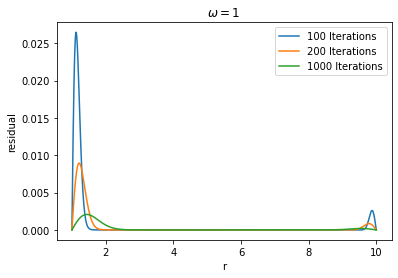

In [10]:
# Source function
def source(r):
    return -4 * np.pi / r**4

# Gauss-seidel
def gauss_seidel(omega, tol, iterations):
    '''
    This gauss_seidel function is the common gauss-seidel method

    Input:
    * omega : the relaxation coefficient
    * tol : tolerance
    * iterations : the number of iterations to run the function

    Output:
    * u: predicted u values, an array
    * residual : residual calculated 
    '''

    #updates the values until the max iterations are reached
    for j in range(iterations):
        residual = np.zeros_like(r)

        #updates u
        for i in range(1, n-1):
            u_current = u[i]
            u_new = 1 / (2 * r[i]) * ((r[i] + h) * u[i+1] \
                    + (r[i] - h) * u[i-1]) + 2 * np.pi * h**2 / (r[i]**4)
            u[i] = (1 - omega) * u_current + omega * u_new

            #finds the residual
            max_diff = abs(u[i] - u_current)
            residual[i] = max_diff
        #this allows the loop to stop early if it's accurate enough
        if max_diff < tol:
            break
        
    return u, residual


# Number of points
n = 1024

# Spacing
h = 1 / (n - 1) # delta r
# Grid points
r = np.linspace(1, 10, n)    
# u values
u = np.zeros_like(r)
# Boundary condition

#this is the solution when r = 1, given the initial conditions
u[0] = 11.744246875
u[-1] = 1

# Now, we implement Gauss-Seidel
y_100, residual_100 = gauss_seidel(1, 1e-12, 100)
y_200, residual_200 = gauss_seidel(1, 1e-12, 200)
y_1000, residual_1000 = gauss_seidel(1, 1e-12, 1000)


# Plot 
plt.plot(r, residual_100, label="100 Iterations")
plt.plot(r, residual_200, label="200 Iterations")
plt.plot(r, residual_1000, label="1000 Iterations")
plt.xlabel("r")
plt.ylabel("residual")
plt.title(r"$\omega = 1$")
plt.legend()
plt.show()


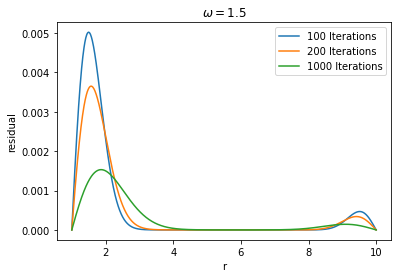

In [11]:
y_100_relax, residual_100_relax = gauss_seidel(1.5, 1e-12, 100)
y_200_relax, residual_200_relax = gauss_seidel(1.5, 1e-12, 200)
y_1000_relax, residual_1000_relax = gauss_seidel(1.5, 1e-12, 1000)

# Plot 
plt.plot(r, residual_100_relax, label="100 Iterations")
plt.plot(r, residual_200_relax, label="200 Iterations")
plt.plot(r, residual_1000_relax, label="1000 Iterations")
plt.xlabel("r")
plt.ylabel("residual")
plt.title(r"$\omega = 1.5$")
plt.legend()
plt.show()

# Exact Solution

We have the exact solution to be 

\begin{align*}
    y(r) = - \frac{2\pi}{r^2} - \frac{c_1}{r} + c_2
\end{align*}
, where $c_1$ and $c_2$ are undetermined constants. 

We can calculate these two constants from the initial conditions:

\begin{align*}
    y'(1) &= 0 \\
    y(10) &= 1
\end{align*}

Based on these two conditions, we get the constants:

\begin{align*}
    c_1 &= - 6\pi \\
    c_2 &= 1 - \frac{29 \pi}{50}
\end{align*}

Thus, the exact solution is 

\begin{align*}
    y(r) = - \frac{2\pi}{r^2} + \frac{6\pi}{r} + \left(1 - \frac{29 \pi}{50}\right)
\end{align*}

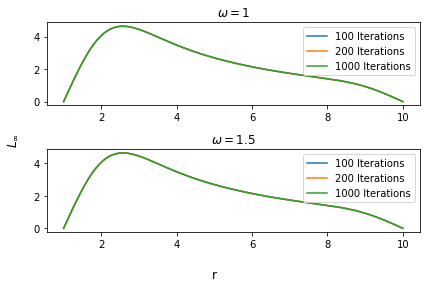

In [12]:
def exact(x):

    return -2 * np.pi / x**2 + (6 * np.pi / x) + (1 - 29 * np.pi / 50)


# Exact y values based on the grid
y_exact = exact(r)

# L_infty
L_infty_100 = abs(y_exact - y_100)
L_infty_200 = abs(y_exact - y_200)
L_infty_1000 = abs(y_exact - y_1000)

L_infty_100_relax = abs(y_exact - y_100_relax)
L_infty_200_relax = abs(y_exact - y_200_relax)
L_infty_1000_relax = abs(y_exact - y_1000_relax)

fig, ax = plt.subplots(2, 1)
fig.supxlabel("r")
fig.supylabel(r"$L_{\infty}$")
ax[0].plot(r, L_infty_100, label="100 Iterations")
ax[0].plot(r, L_infty_200, label="200 Iterations")
ax[0].plot(r, L_infty_1000, label="1000 Iterations")
ax[0].legend()
ax[0].set_title(r"$\omega = 1$")

ax[1].plot(r, L_infty_100_relax, label="100 Iterations")
ax[1].plot(r, L_infty_200_relax, label="200 Iterations")
ax[1].plot(r, L_infty_1000_relax, label="1000 Iterations")
ax[1].legend()
ax[1].set_title(r"$\omega = 1.5$")


plt.tight_layout()



This Python code implements the Gauss-Seidel method to solve a particular differential equation numerically and then visualizes the convergence of the solution through residual plots. 

`gauss_seidel` function: This function implements the Gauss-Seidel iterative method to solve a finite difference equation. It takes three arguments:
   - `omega`: The relaxation coefficient, a parameter that controls the convergence rate of the method.
   - `tol`: The tolerance, which is used to determine when to stop the iterations based on the maximum difference between the current and updated values.
   - `iterations`: The maximum number of iterations to run the Gauss-Seidel method.

   Inside the function:
   - It iterates for a maximum of `iterations` times.
   - It initializes an array `residual` to track the residuals (differences between current and updated values) at each grid point.
   - It updates the values of `u` (the solution) using the Gauss-Seidel iteration formula.
   - It calculates the residual at each grid point and checks if the maximum residual is less than `tol`. If it is, the loop breaks early to stop the iterations.

Initialization of problem parameters:
   - `n`: The number of grid points (1024 in this case).
   - `h`: The spacing between grid points, computed as `1 / (n - 1)`.
   - `r`: An array representing the grid points, ranging from 1 to 10, evenly spaced.
   - `u`: An array initialized with zeros to store the solution.
   - Boundary conditions: `u[0]` and `u[-1]` are set to specific values (in this case, 11.744246875 and 1) to define boundary conditions for the problem. We used `u[0] = 11.744246875` to decrease our error because that is the solution when r=1. 

Implementation of Gauss-Seidel for different numbers of iterations (100, 200, and 1000) using the `gauss_seidel` function. The results are stored in `y_100`, `y_200`, and `y_1000`, and the corresponding residuals are stored in `residual_100`, `residual_200`, and `residual_1000`.

The code demonstrates the use of the Gauss-Seidel method to solve a differential equation with specific boundary conditions and plots the residuals to visualize the convergence of the solution for different numbers of iterations. It is clear that 100 iterations has the largest residual. This is unsurprising because 100 iterations should look most like the initial guess since it has not had as many iterations to become more accurate. Interestingly, the three iterations almost intersect just before r = 10.

We found the exact solution to calculate the L infinity norm of the error and we found that all three iterations had roughly the same error throught all r values. Changing the relaxation parameter did not seem to have an effect on the error. The error was very high at the beginning, and this is because we set approximated `u[0] = 11.744246875`. This is the approximate solution when r=1.